In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('winequality-red.csv')

In [3]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset does not contain any missing values

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Text(0.5, 1.0, 'Correlation Between Quality & Other Features')

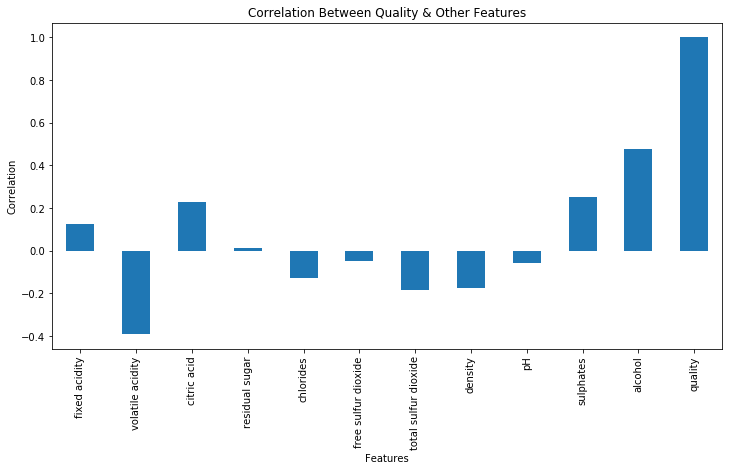

In [5]:
plt.figure(figsize= (12,6))
dataset.corr()['quality'].plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation Between Quality & Other Features')

The above plot, demonstrates that the following features, have a relatively lower correlation with the outcome (quality) :
1. Residual Sugar
2. Free Sulfur Dioxide
3. pH

<br>Thus these factors will be dropped from the dataset.

In [6]:
dataset.drop('residual sugar', axis=1, inplace=True)
dataset.drop('free sulfur dioxide', axis=1, inplace=True)
dataset.drop('pH', axis=1, inplace=True)

In [7]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.093705,-0.113181,0.668047,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.061298,0.076470,0.022026,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.203823,0.035533,0.364947,0.312770,0.109903,0.226373
chlorides,0.093705,0.061298,0.203823,1.000000,0.047400,0.200632,0.371260,-0.221141,-0.128907
total sulfur dioxide,-0.113181,0.076470,0.035533,0.047400,1.000000,0.071269,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.200632,0.071269,1.000000,0.148506,-0.496180,-0.174919
sulphates,0.183006,-0.260987,0.312770,0.371260,0.042947,0.148506,1.000000,0.093595,0.251397
alcohol,-0.061668,-0.202288,0.109903,-0.221141,-0.205654,-0.496180,0.093595,1.000000,0.476166
quality,0.124052,-0.390558,0.226373,-0.128907,-0.185100,-0.174919,0.251397,0.476166,1.000000


Text(0, 0.5, 'Density')

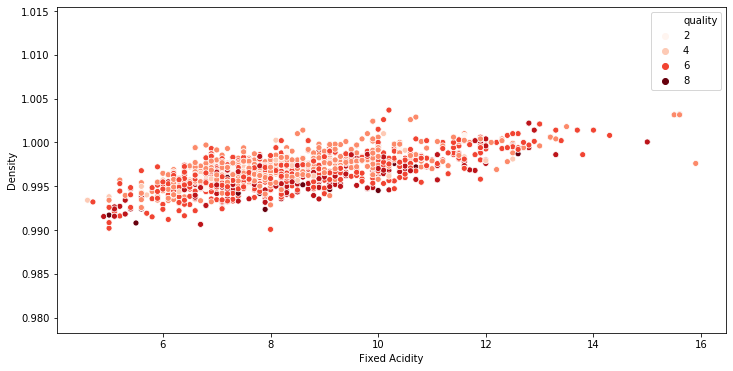

In [8]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='fixed acidity', y='density', hue= 'quality', data= dataset, palette= 'Reds')
plt.xlabel('Fixed Acidity')
plt.ylabel('Density')

It can be observed, irrespective of the quality of the wine, the **Density Of Wine** increases with increase in **Fixed Acidity Of The Wine**.

Text(0.5, 0, 'Fixed Acidity')

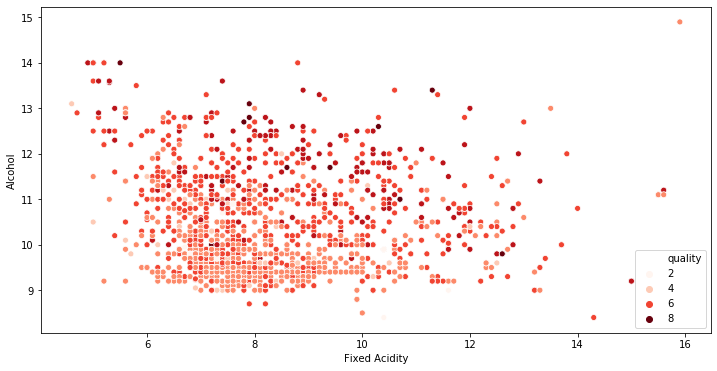

In [9]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='fixed acidity', y='alcohol', hue= 'quality', data= dataset, palette='Reds')
plt.ylabel('Alcohol')
plt.xlabel('Fixed Acidity')

It can be observed that, **Lower Quality Wines** have **Lower Alcohol Content** and **Lower Fixed Acidity**

Text(0.5, 0, 'Density')

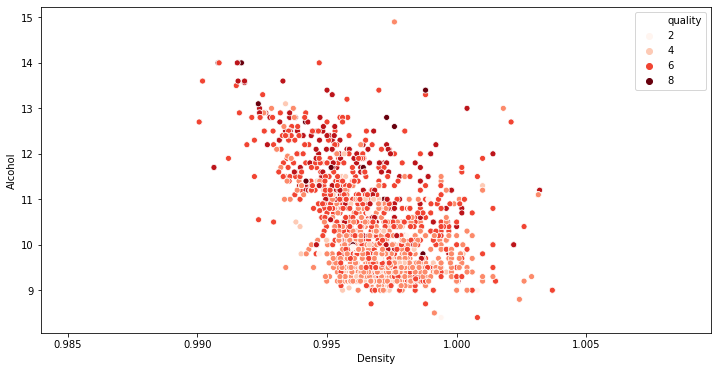

In [10]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='density', y='alcohol', hue= 'quality', data= dataset, palette='Reds')
plt.ylabel('Alcohol')
plt.xlabel('Density')

It can be observed that, **Lower Quality Wines** have a **Lower Alcohol Content** irrespective of the **Density**.

Text(0.5, 0, 'Quality Of Wine')

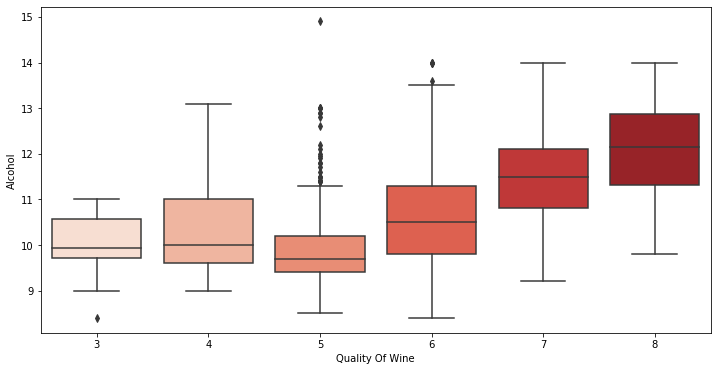

In [11]:
plt.figure(figsize = (12,6))
sns.boxplot('quality', 'alcohol', data=dataset, palette='Reds')
plt.ylabel('Alcohol')
plt.xlabel('Quality Of Wine')

It can be clearly observed, that **Higher The Quality Of Wine, Higher The Alcohol Content**

Text(0.5, 0, 'Citric Acid')

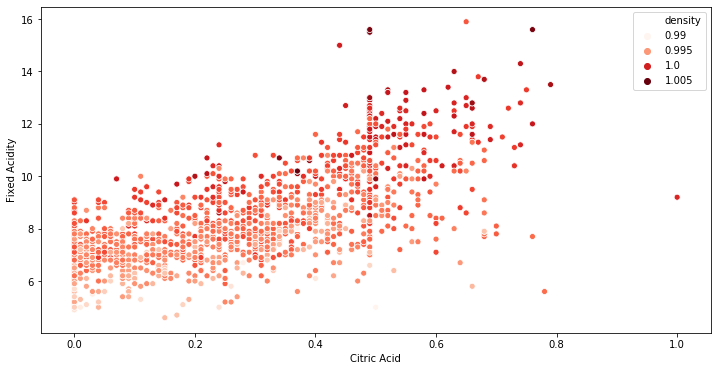

In [12]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='citric acid', y='fixed acidity', hue= 'density', data= dataset, palette='Reds')
plt.ylabel('Fixed Acidity')
plt.xlabel('Citric Acid')

**Fixed Density Of Wine** is directly proportional to the amount of **Critic Acid In Wine**. The **Density Of Wine** increases with the increase in **Fixed Acidity Of Wine**

### Defining Target Variable
<br>
A Wine Is Considered A Good Quality Wine If : Quality Score >= 6 (O/P = 1)

In [13]:
dataset['good_wine'] = dataset['quality'].apply(lambda x : 1 if (x >= 6) else 0)

In [14]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,good_wine
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6,1
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5,0


In [15]:
dataset['good_wine'].value_counts()

1    855
0    744
Name: good_wine, dtype: int64

In [16]:
dataset.to_csv('preprocessed_data.csv')